# Test Augmented Dickey-Fuller
Aplicación del test de Dickey-fuller a la serie temporal y análisis de resultados.

In [9]:
from pandas import read_csv

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from statsmodels.tsa.stattools import adfuller

## Carga del archivo
Serie temporal para analizar con ADF

In [12]:
series = read_csv('../../datasets/output/nonstationary/I20181021_ch0_106206.csv', index_col=0, header=None, names=['vol'])
print(series.shape)
series.head()

(288, 1)


,vol
0,0
1,0
2,0
3,0
4,0


## Gráfico de series temporales

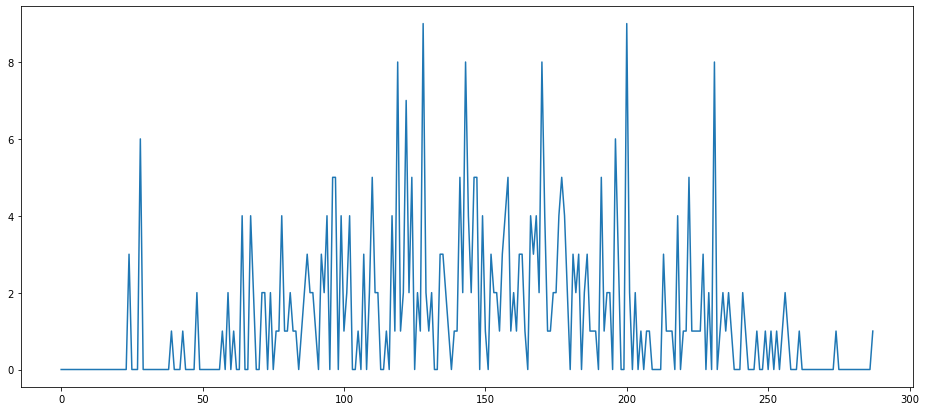

In [13]:
plt.figure(figsize=(16,7))
plt.plot(series.index, series.values)

## Aplicando test ADF
Es una versión aumentada del test de Dickey-Fuller para series más largas o más complicadas.
La hipótesis nula del test es que existe una *raiz unitaria* en la serie.
La hipótesis alternativa depende de la versión del test pero generalmente es que la serie de tiempo es stationary o tiene tendencia stationary (trend-stationary).

In [14]:
adf_result = adfuller(series)

In [15]:
print('ADF Statistics: %f'%adf_result[0])
print('p-value: %f'%adf_result[1])
print('Critical values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -2.763267
p-value: 0.063715
Critical values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


La estadística ADF usada en el test es un número negativo. Entre más negativo sea el valor, más fuerte es el rechazo de la hipótesis nula (existe una raíz unitaria) con cierto nivel de confianza.

In [16]:
if adf_result[0] < adf_result[4]['5%']:
    print('Rejected H0 - Time Series is Stationary')
else:
    print('Failed to reject H0 - Time Series is Non-Stationary')

Failed to reject H0 - Time Series is Non-Stationary
